In [1]:
%load_ext autoreload
%autoreload 

from preprocessing.preprocess_ucr import UCRDatasetImporter
from preprocessing.preprocess_ucr import UCRDataset
from preprocessing.preprocess_ucr import AugUCRDataset
from preprocessing.data_pipeline import build_data_pipeline
from utils import load_yaml_param_settings

from utils import time_to_timefreq, timefreq_to_time
from preprocessing.augmentations import TimeFreqAugmenter, Augmenter
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import torch.nn.functional as F
import math

/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = load_yaml_param_settings("configs/config.yaml")

config['dataset']['dataset_name'] = 'UWaveGestureLibraryAll'
config["VQVAE"]["n_fft"] = 8

# data pipeline
dataset_importer = UCRDatasetImporter(**config["dataset"])
batch_size = config["dataset"]["batch_sizes"]["stage1"]
train_data_loader_aug = build_data_pipeline(
    batch_size, dataset_importer, config, "train", augment=True
)
train_data_loader = build_data_pipeline(
    batch_size, dataset_importer, config, "train", augment=False
)

test_data_loader = build_data_pipeline(batch_size, dataset_importer, config, "test")

augmenter = TimeFreqAugmenter(**config["augmentations"]["aug_params"])

self.X_train.shape: (896, 945)
self.X_test.shape: (3582, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]


In [3]:
for batch in train_data_loader_aug:
    x_batch, y = batch
    break

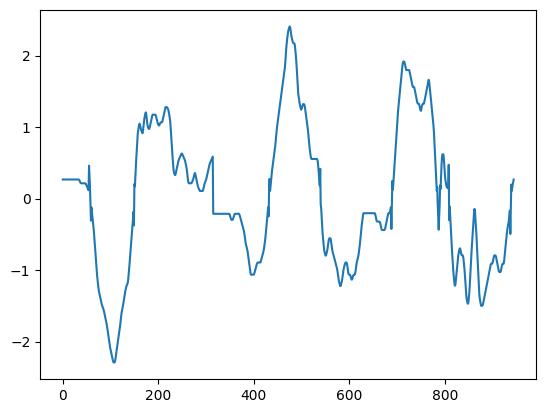

In [8]:
x, aug_pairs = x_batch

plt.plot(x[0, 0])

torch.Size([128, 1, 945]) torch.Size([128, 1, 945]) torch.Size([128, 1, 945]) torch.Size([128, 1, 945])


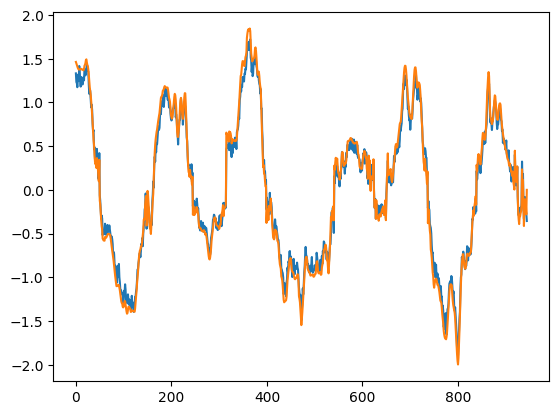

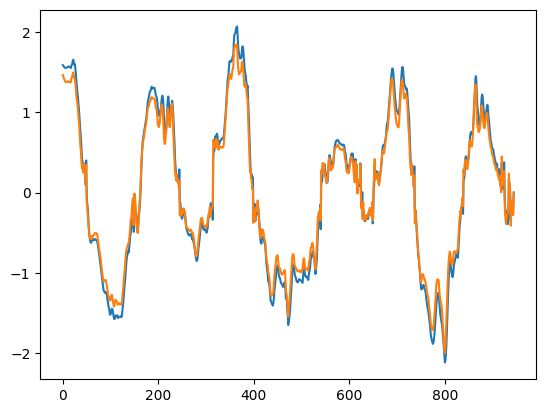

In [16]:
timeaugs, timefreq_augs = aug_pairs
x_time1, x_time2 = timeaugs
x_timefreq1, x_timefreq2 = timefreq_augs
print(x_time1.shape, x_time2.shape, x_timefreq1.shape, x_timefreq2.shape)

idx = 2
plt.plot(x_time1[idx, 0])
plt.plot(x_time2[idx, 0])
plt.show()
plt.plot(x_timefreq1[idx, 0])
plt.plot(x_timefreq2[idx, 0])

In [4]:
from utils import time_to_timefreq, timefreq_to_time


In [5]:
x, xaug = x_batch

u = time_to_timefreq(x, config["VQVAE"]["n_fft"], x.shape[1])
u_aug = time_to_timefreq(xaug, config["VQVAE"]["n_fft"], x.shape[1])
z_1 = encoder(u)
z_2 = encoder(u_aug)

AttributeError: 'list' object has no attribute 'device'

In [ ]:
for batch in train_data_loader_aug:
    x_batch, y = batch
    break

NameError: name 'train_data_loader_aug' is not defined

In [ ]:
from experiments.exp_vqvae import Exp_VQVAE

input_length = train_data_loader.dataset.X.shape[-1]

train_exp = Exp_VQVAE(
    input_length,
    config=config,
    n_train_samples=len(train_data_loader.dataset),
    train_data_loader=train_data_loader,
    test_data_loader=test_data_loader,
)
encoder = train_exp.encoder

In [ ]:
def get_x_u():
    X = torch.tensor(train_data_loader.dataset.X)
    x = X[np.random.randint(0, X.shape[0])]
    return x, augmenter.stft(x)



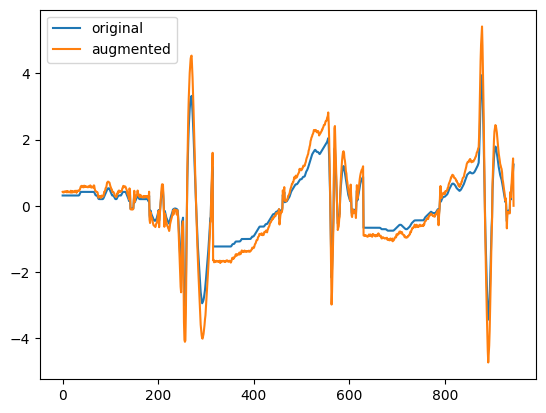

In [ ]:

config = load_yaml_param_settings("configs/config.yaml")


aug = Augmenter(**config["augmentations"])


x, _ = get_x_u()
xaug = aug.augment(x)
plt.plot(x, label="original")
plt.plot(xaug, label="augmented")  # Include the augmented signal in the plot
plt.legend()
plt.show()#plot the original and augmented signals